<a href="https://colab.research.google.com/github/hafizaiqra736/Ames-Housing/blob/main/Ames_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['AmesHousing.csv']
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.2545 - val_loss: 0.6046
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5687 - val_loss: 0.4529
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4400 - val_loss: 0.3531
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3801 - val_loss: 0.4382
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4512 - val_loss: 0.3352
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3277 - val_loss: 0.3479
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4147 - val_loss: 0.3420
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2878 - val_loss: 0.2838
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3238 - val_loss: 0.4006
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3770 - val_loss: 0.3903


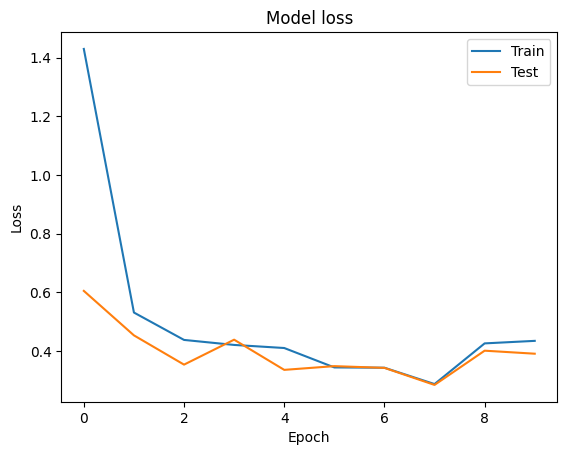

In [ ]:
import pandas as pd

import zipfile
import os

zipi =  '/content/archive (1).zip'
e = '/content/archive'

with zipfile.ZipFile(zipi, 'r') as zip_ref:
    zip_ref.extractall(e)
    print(os.listdir(e))

data =  pd.read_csv('/content/archive (1).zip')
df = pd.DataFrame(data)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# impute missing values for numerical values
num_col = df.select_dtypes(include=['int64', 'float64']).columns

from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy='mean')
df[num_col] = num_imp.fit_transform(df[num_col])

# impute missing values for categorical values
cat_col = df.select_dtypes(include=['object']).columns
cat_imp = SimpleImputer(strategy='most_frequent')
df[cat_col] = cat_imp.fit_transform(df[cat_col])

# One-Hot Encoding
df = pd.get_dummies(df, columns=cat_col, drop_first=True)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])


ord_col = ['Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Kitchen Qual', 'Low Qual Fin SF','Garage Qual','Garage Cond']
# Handle Ordinal Variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ord_col:
    if col in df.columns:
      df[col] = le.fit_transform(df[col])
      print(df[col].unique())
    else:
        print(f"Column '{col}' not found in DataFrame.")

from sklearn.model_selection import train_test_split
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# evaluate linear regression using mse
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("linear regression - Mean Squared Error:", mse)
print("linear regression - R-squared:", r2)

# randomforest regressor
modelr = RandomForestRegressor(n_estimators=100)
modelr.fit(x_train, y_train)
y_predr = modelr.predict(x_test)
mse_rf = mean_squared_error(y_test, y_predr)
r2_rf = r2_score(y_test, y_predr)
print(r2_rf)
print("Random Forest Regressor - Mean Squared Error:", mse_rf)
print("Random Forest Regressor - R-squared:", r2_rf)

# decision tree
from sklearn.tree import DecisionTreeRegressor
modelt = DecisionTreeRegressor()
modelt.fit(x_train, y_train)
y_predt = modelt.predict(x_test)
mse_dt = mean_squared_error(y_test, y_predt)
r2_dt = r2_score(y_test, y_predt)
print(r2_dt)
print("Decision Tree Regressor - Mean Squared Error:", mse_dt)
print("Decision Tree Regressor - R-squared:", r2_dt)

# Using XGBoost as xgb
import xgboost as xgb

# split dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgboost_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.4, max_depth=6, n_jobs=1)
xgboost_model.fit(x_train, y_train)
y_pred_xgb = xgboost_model.predict(x_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"XGBoost RMSE: {rmse}")
# using light as lgb
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators= 1000, learning_rate=0.05)

# train model
lgb_model.fit(x_train, y_train)

# predict model
y_pred_lgb = lgb_model.predict(x_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred_lgb)
rmse = mse ** 0.5
print(f"LightGBM RMSE: {rmse}")

# using catboost

from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, silent=True)

# train model
catboost_model.fit(x_train, y_train)

# predict model
y_pred_catboost = catboost_model.predict(x_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred_catboost)
rsme = mse ** 0.5
print(f"CatBoost RMSE: {rsme}")


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
model = Sequential()
# Build the model with L2 regularization and Dropout
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1))

# Compile the model with Exponential Decay learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=100000, decay_rate=0.96, staircase=True)
optimizer = Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='mean_squared_error')

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with Early Stopping and Learning Rate Scheduler
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10,
                    batch_size=32, callbacks=[early_stopping])




import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

